In [ ]:
#pip install python-bcb

In [19]:
from bcb import sgs
import pandas as pd

In [20]:
#df_bcb = sgs.get({'selic_meta_%aa': 432, 'ipca_%am': 433}, start='2016-01-01', end='2018-12-31')
df_bcb = sgs.get({'selic_meta_%aa': 432, 'selic_over_%am': 4390, 'ipca_%am': 433}, start='2016-01-01', end='2018-12-31')

# selic over: uma média das taxas diárias das operações de um dia entre bancos, lastreadas em títulos federais. 
#fonte: https://dadosabertos.bcb.gov.br/dataset/4390-taxa-de-juros---selic-acumulada-no-mes

In [21]:
print(df_bcb.head()) 

            selic_meta_%aa  selic_over_%am  ipca_%am
Date                                                
2016-01-01           14.25            1.06      1.27
2016-01-02           14.25             NaN       NaN
2016-01-03           14.25             NaN       NaN
2016-01-04           14.25             NaN       NaN
2016-01-05           14.25             NaN       NaN


In [ ]:
df_bcb.info() # valores NaN aqui não indicam erro com a série, mas que a taxa coletada é calculada uma vez ao mês

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2016-01-01 to 2018-12-31
Freq: D
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   selic_meta_%aa  1096 non-null   float64
 1   selic_over_%am  36 non-null     float64
 2   ipca_%am        36 non-null     float64
dtypes: float64(3)
memory usage: 34.2 KB


In [23]:
df_bcb.value_counts()

selic_meta_%aa  selic_over_%am  ipca_%am
6.50            0.47             0.48       1
                0.49            -0.21       1
                                 0.15       1
                0.52             0.22       1
                                 0.40       1
                                 1.26       1
                0.54             0.33       1
                                 0.45       1
                0.57            -0.09       1
6.75            0.53             0.09       1
7.00            0.47             0.32       1
                0.58             0.29       1
7.50            0.54             0.44       1
                0.57             0.28       1
8.25            0.64             0.42       1
9.25            0.64             0.16       1
                0.80             0.19       1
10.25           0.80             0.24       1
                0.81            -0.23       1
11.25           0.93             0.31       1
12.25           0.79             0.14  

In [24]:
df_bcb['ipca_am'] = df_bcb['ipca_%am'] / 100 # conversão para ipca mensal (decimal)
df_bcb['selic_over_am'] = df_bcb['selic_over_%am'] / 100 # conversão em selic over mensal (decimal)
df_bcb['selic_over_real_am'] = ((1 + df_bcb['selic_over_am']) / (1 + df_bcb['ipca_am'])) - 1 # fórmula de Fisher

In [25]:
df_bcb.head()

,selic_meta_%aa,selic_over_%am,ipca_%am,ipca_am,selic_over_am,selic_over_real_am
Date,,,,,,
2016-01-01,14.25,1.06,1.27,0.0127,0.0106,-0.002074
2016-01-02,14.25,NaN,NaN,NaN,NaN,NaN
2016-01-03,14.25,NaN,NaN,NaN,NaN,NaN
2016-01-04,14.25,NaN,NaN,NaN,NaN,NaN
2016-01-05,14.25,NaN,NaN,NaN,NaN,NaN


In [26]:
df_bcb.index = pd.to_datetime(df_bcb.index) # garantir que Index seja um datetime
df_bcb.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1096, freq='D')

In [36]:
df_bcb_mensal = df_bcb.resample('ME').agg({
    'ipca_am': 'max', 
    'selic_over_am': 'last'
}) # agrupar os dados para frequência mensal

In [37]:
df_bcb_mensal['selic_over_real_am'] = ((1 + df_bcb_mensal['selic_over_am']) / (1 + df_bcb_mensal['ipca_am'])) - 1 # calcular o juro real mensal sobre os dados agragados e após o resample para evitar distorções de NaNs diários

In [38]:
df_bcb_mensal.dropna(subset=['ipca_am'], inplace=True) # remove meses que não possuem dados de ipca

In [39]:
print(df_bcb_mensal.head(), df_bcb_mensal.tail())

            ipca_am  selic_over_am  selic_over_real_am
Date                                                  
2016-01-31   0.0127         0.0106           -0.002074
2016-02-29   0.0090         0.0100            0.000991
2016-03-31   0.0043         0.0116            0.007269
2016-04-30   0.0061         0.0106            0.004473
2016-05-31   0.0078         0.0111            0.003274             ipca_am  selic_over_am  selic_over_real_am
Date                                                  
2018-08-31  -0.0009         0.0057            0.006606
2018-09-30   0.0048         0.0047           -0.000100
2018-10-31   0.0045         0.0054            0.000896
2018-11-30  -0.0021         0.0049            0.007015
2018-12-31   0.0015         0.0049            0.003395


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [41]:
PALETA_OLIST = ["#0047bb", "#94a3b8", "#1e293b", "#3b82f6", "#e2e8f0"] # configuração gráfica da equipe
sns.set_theme(style="whitegrid")

plt.rcParams.update({
    'axes.prop_cycle': plt.cycler(color=PALETA_OLIST),
    'figure.figsize': (12, 8),
    'axes.titlesize': 16,
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold',
    'axes.edgecolor': '#94a3b8'
})

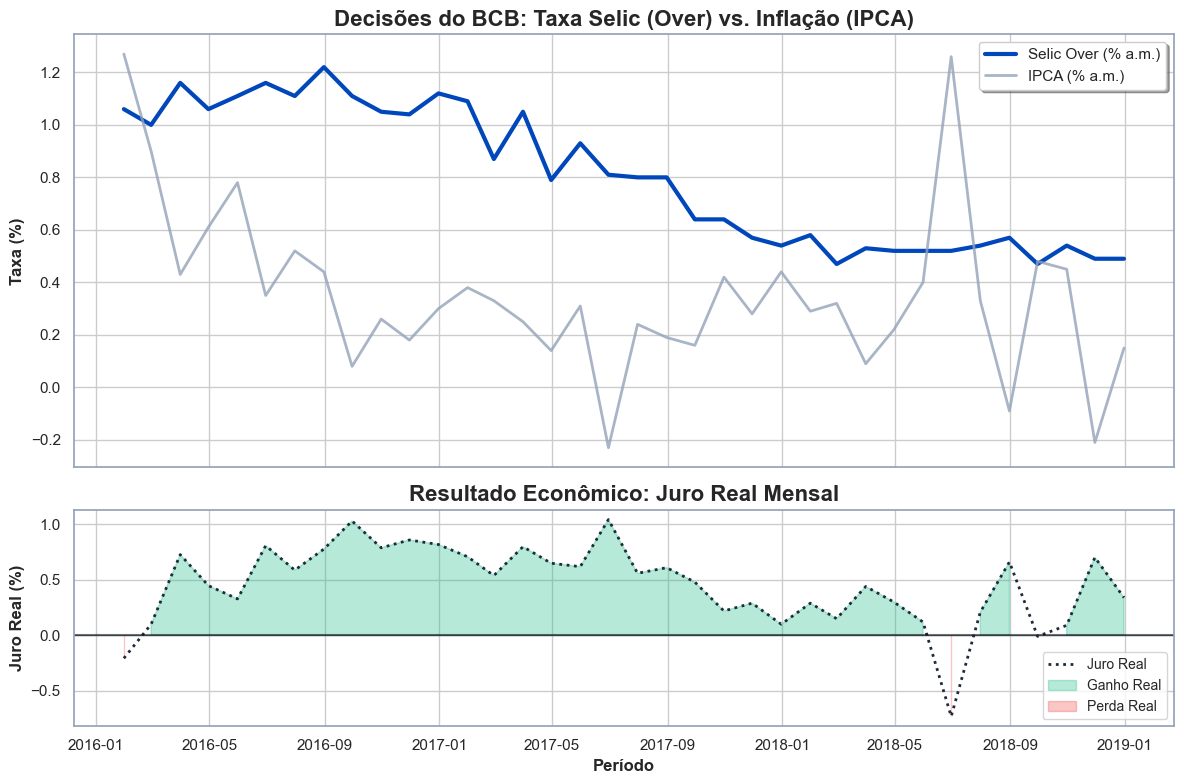

In [44]:

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [2, 1]})

ax1.plot(df_bcb_mensal.index, df_bcb_mensal['selic_over_am'] * 100, 
        label='Selic Over (% a.m.)', color=PALETA_OLIST[0], linewidth=3)
ax1.plot(df_bcb_mensal.index, df_bcb_mensal['ipca_am'] * 100, 
        label='IPCA (% a.m.)', color=PALETA_OLIST[1], linewidth=2, alpha=0.8)

ax1.set_title('Decisões do BCB: Taxa Selic (Over) vs. Inflação (IPCA)')
ax1.set_ylabel('Taxa (%)')
ax1.legend(loc='upper right', frameon=True, shadow=True)

juro_real_pct = df_bcb_mensal['selic_over_real_am'] * 100

ax2.plot(df_bcb_mensal.index, juro_real_pct, 
        label='Juro Real', color=PALETA_OLIST[2], linewidth=2, linestyle=':')


ax2.axhline(0, color='black', linewidth=1.5, alpha=0.5)


ax2.fill_between(df_bcb_mensal.index, juro_real_pct, 0, 
                where=(juro_real_pct >= 0), color='#10b981', alpha=0.3, label='Ganho Real')
ax2.fill_between(df_bcb_mensal.index, juro_real_pct, 0, 
                where=(juro_real_pct < 0), color='#ef4444', alpha=0.3, label='Perda Real')


ax2.axhline(0, color=PALETA_OLIST[2], linewidth=1, alpha=0.6)

ax2.set_title('Resultado Econômico: Juro Real Mensal')
ax2.set_ylabel('Juro Real (%)')
ax2.set_xlabel('Período')
ax2.legend(loc='lower right', fontsize='small')


plt.tight_layout()
plt.savefig('analise_macro.png', dpi=300)
plt.show()

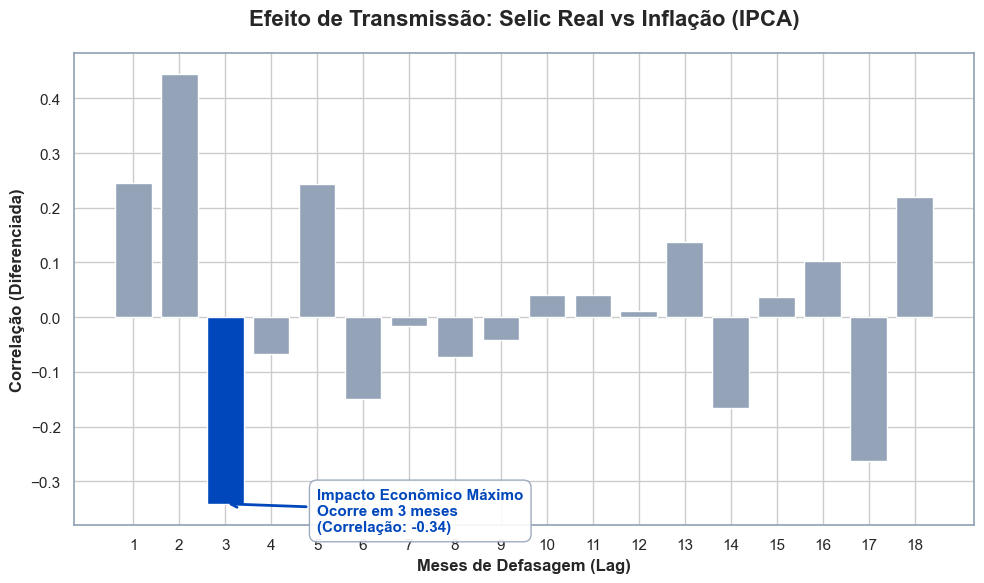

In [42]:
# 2. Cálculo da correlação (usando os dados diferenciados para precisão)
lags = np.arange(1, 19) # Começamos do 1 para ignorar o artefato do Lag 0
corrs = [df_bcb_mensal['ipca_am'].diff().corr(df_bcb_mensal['selic_over_real_am'].diff().shift(l)) for l in lags]

max_lag = np.nanargmin(corrs) + 1 # +1 pois o índice 0 da lista é o lag 1
max_corr = corrs[max_lag - 1]

fig, ax = plt.subplots(figsize=(10, 6))

cores_barras = [PALETA_OLIST[0] if i == max_lag else PALETA_OLIST[1] for i in lags]

ax.bar(lags, corrs, color=cores_barras, edgecolor='white')

ax.set_title('Efeito de Transmissão: Selic Real vs Inflação (IPCA)', pad=20)
ax.set_xlabel('Meses de Defasagem (Lag)')
ax.set_ylabel('Correlação (Diferenciada)')
ax.set_xticks(lags)

ax.annotate(f'Impacto Econômico Máximo\nOcorre em {max_lag} meses\n(Correlação: {max_corr:.2f})', 
        xy=(max_lag, max_corr), 
        xytext=(max_lag + 2, max_corr - 0.05),
        arrowprops=dict(arrowstyle='->', color=PALETA_OLIST[0], lw=2),
        fontsize=11, fontweight='bold', color=PALETA_OLIST[0],
        bbox=dict(boxstyle='round,pad=0.5', fc='white', ec=PALETA_OLIST[1], alpha=0.9))

plt.tight_layout()
plt.savefig('correlograma_final.png', dpi=300)
plt.show()

In [45]:
r_quadrado = max_corr**2
print(f'Juro Real explica sozinho aproximadamente {r_quadrado * 100:.2f}% da variação da inflação no período.')

Juro Real explica sozinho aproximadamente 11.64% da variação da inflação no período.


In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler() # instanciar o escalonador

In [48]:
colunas = ['selic_over_am', 'ipca_am', 'selic_over_real_am']

In [49]:
df_bcb_mensal[['selic_over_std', 'ipca_std', 'selic_over_real_std']] = scaler.fit_transform(df_bcb_mensal[colunas]) # criando colunas com as variaveis padronizadas

In [50]:
print(df_bcb_mensal[['selic_over_std', 'ipca_std', 'selic_over_real_std']].describe().round(2)) # confirmando a transformação com os valores das médias e desvios padrão

       selic_over_std  ipca_std  selic_over_real_std
count           36.00     36.00                36.00
mean            -0.00     -0.00                -0.00
std              1.01      1.01                 1.01
min             -1.29     -1.86                -3.28
25%             -1.02     -0.53                -0.65
50%             -0.02     -0.12                 0.16
75%              0.99      0.28                 0.73
max              1.60      2.92                 1.64


In [51]:
df_bcb_mensal[['selic_over_std', 'ipca_std', 'selic_over_real_std']] = df_bcb_mensal[['selic_over_std', 'ipca_std', 'selic_over_real_std']].round(2)

In [52]:
df_bcb_mensal.head(10)

,ipca_am,selic_over_am,selic_over_real_am,selic_over_std,ipca_std,selic_over_real_std
Date,,,,,,
2016-01-31,0.0127,0.0106,-0.002074,0.99,2.92,-1.83
2016-02-29,0.0090,0.0100,0.000991,0.75,1.74,-0.98
2016-03-31,0.0043,0.0116,0.007269,1.37,0.24,0.77
2016-04-30,0.0061,0.0106,0.004473,0.99,0.82,-0.01
2016-05-31,0.0078,0.0111,0.003274,1.18,1.36,-0.34
2016-06-30,0.0035,0.0116,0.008072,1.37,-0.01,0.99
2016-07-31,0.0052,0.0111,0.005869,1.18,0.53,0.38
2016-08-31,0.0044,0.0122,0.007766,1.60,0.28,0.91
2016-09-30,0.0008,0.0111,0.010292,1.18,-0.87,1.61


In [53]:
df_entrega = df_bcb_mensal.reset_index() # resetando o índice para que a data vire uma coluna comum

In [54]:
df_entrega.head()

,Date,ipca_am,selic_over_am,selic_over_real_am,selic_over_std,ipca_std,selic_over_real_std
0,2016-01-31,0.0127,0.0106,-0.002074,0.99,2.92,-1.83
1,2016-02-29,0.0090,0.0100,0.000991,0.75,1.74,-0.98
2,2016-03-31,0.0043,0.0116,0.007269,1.37,0.24,0.77
3,2016-04-30,0.0061,0.0106,0.004473,0.99,0.82,-0.01
4,2016-05-31,0.0078,0.0111,0.003274,1.18,1.36,-0.34


In [55]:
df_entrega.to_csv('analise_ipca_selic_processado_atualizado.csv', index=False)